# Simple regression

線性回歸(Linear regresion) 是 監督學習(supervised learning)，最簡單的線性回歸稱為簡單回歸(Simple regression)，
$$
y = a x +b
$$
$x$ 是輸入，$y$ 是輸出。


我們先來看一個栗子，假設三個人

| **姓名** | **性別** | **年紀** | **身高** |
| :----: | :----: | :----: | :----: |
| 小王 | 男 | 5 | $51$ |
| 小明 | 男 | 6 | $55$ |
| 小呆 | 男 | 7 | $59$ |

如果我們想要估計他們的身高經由年紀去估計，因該怎麼估計阿。


## 參考答案
身高 ~ $25 +$年紀 X $5$ <br>

下面我們用視覺來看這個問題，用一條直線來估計


$$
y = ax + b
$$

其中 $a$ 是斜率 *slope*, $b$ 是截距 *intercept*。 <br>

下面要考慮
$$
y = 5 x + 25
$$



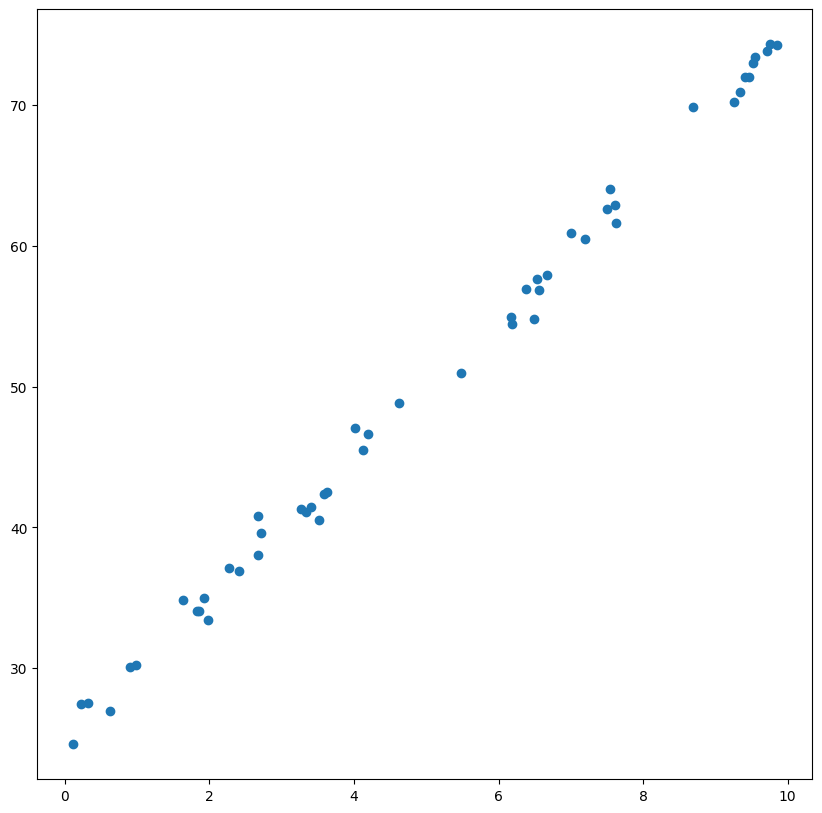

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# 設定圖片大小
plt.rcParams['figure.figsize'] = [10, 10]


rands = np.random.RandomState(87)
x = 10 * rands.rand(50)
y = 5 * x + 25 + rands.randn(50)
plt.scatter(x, y)


我們下面要用 Scikit-Learn 的 Linear Regression 去找一條最符合的線。

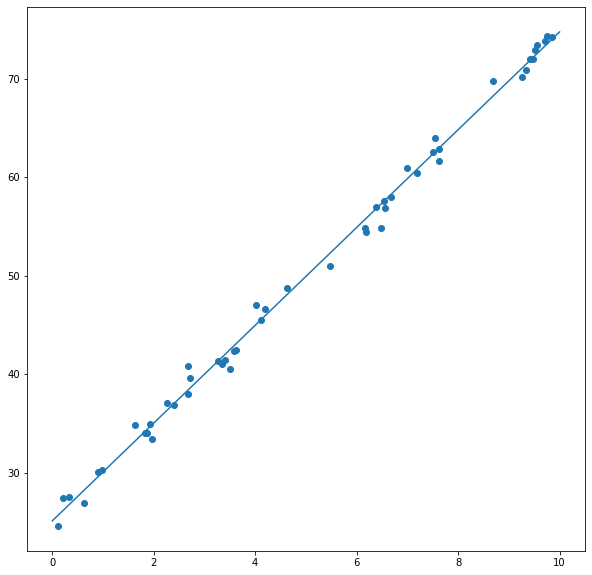

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

# Linear Regresion

下面我們要抽象的處理這類問題。 <br>

假設 $y$ 是目標要預測的值，$X$ 是我們用來估計 $y$。 <br>
現在的目標就是找出線性函數 $\hat{y}$ 去逼近 $y$

$$
\begin{align}
\hat{y}(w,x) &= w_0 + w_1x_1 + w_2x_2 + … + w_nx_n \\
&= w_0 + wX
\end{align}
$$

我們先假設符號

$$
w = (w_1, ⋯ ,w_n)
$$
叫 coefficients 係數 （ 程式裡叫 coef_ ）, 
另外 $w_0$ 叫 intercept 截距 （ 程式裡叫 intercept_ ）。

## 數學阿宅的語言
我們所要解的問題如果用矩陣表示，
$$
\min_w \| wX -y \|_2^2
$$
如果用函數表示，
$$
\min_w \| f_w^{linear}(X) - y \|_2^2
$$

## 筆記 norm
假設 $ v = (v_1, \cdots, v_n)$ 
* one norm
$$
\| v \|_1 = \sum_{i=1}^n |v_i|
$$
* two norm
$$
\| v \|_2 = \sqrt{\sum_{i=1}^n v_i^2}
$$
我們等一下介紹更多模型的時候會需要這些知識。

## 下面我們來看其他例子



In [ ]:
# 先準備資料
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# 下載 糖尿病資料
X, y = datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# 準備模型
regression = linear_model.LinearRegression()
# 訓練模型
regression.fit(X_train, y_train)
# 預測結果
y_pred = regression.predict(X_test)

print('w 係數：', regression.coef_)
print('w_0 截距：', regression.intercept_)

# The mean squared error 我們以後會介紹 metrics 就會認識 mse，現在先用。
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))


w 係數： [  -6.39811615 -262.68763478  532.70279918  258.19222936 -654.96794876
  430.8717354   -34.50145194   49.49856918  763.53014004   29.47340317]
w_0 截距： 153.32342338447705
Mean squared error: 2837.89


如果我們要求前面的係數 $w$ 都為正。

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


X, y = datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# 準備模型 這邊要多加一個參數 positive=True
regression = linear_model.LinearRegression(positive=True)

regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

print('w 係數：', regression.coef_)
print('w_0 截距：', regression.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))


w 係數： [  0.           0.         634.81544934 174.17425338   0.
   0.           0.          59.27293029 528.41518712   0.        ]
w_0 截距： 152.84306732984055
Mean squared error: 2983.29


# Ridge Regression, Lasso and Elastic-Net

我們前面提過了 over fitting 的問題，大家還記得嗎，那怎麼樣的模型會被認為是不容易 over fitting? <br>
答案是不複雜的模型，那對於不同演算法來說，複雜不複雜的概念是不同的，我們現在面對的是線性模型，所以我們就專注來看線性模型，我們會認為線性模型前面的係數
$$
w = (w_1, ⋯ ,w_n)
$$
沒錯就是 $w$ 如果不大，那代表模型不複雜。


- Ridge Regression 其實就是 迴歸 + 係數 2-norm 不要太大
- Lasso 其實就是 迴歸 + 係數 1-norm 不要太大
- Elastic-Net 其實就是 迴歸 + 係數 1-norm 不要太大 + 係數 2-norm 不要太大



## 數學阿宅的語言
- Ridge Regression
$$
\min_w \| wX -y \|_2^2 + \alpha \| w \|_2^2
$$
- Lasso
$$
\min_w \| wX -y \|_2^2 + \alpha \| w \|_1
$$
- Elastic-Net
$$
\min_w \| wX -y \|_2^2 + \alpha \Big (\rho \| w \|_1 + (1-\rho) \| w \|_2^2 \Big )
$$
where $\alpha > 0, \rho \in [0, 1]$.


下面開始實戰。


In [ ]:
# Ridge Regression
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


X, y = datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# 準備 Ridge 模型 
regression = linear_model.Ridge(alpha=0.5)

regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

print('w 係數：', regression.coef_)
print('w_0 截距：', regression.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))


w 係數： [  32.43756563 -136.8069823   368.26556985  198.09356868   -6.12140339
  -49.09960842 -185.7585906   114.52801713  319.84134654   82.5232301 ]
w_0 截距： 153.1258158721526
Mean squared error: 2975.83


# Ridge Classification
下面介紹 Ridge 怎麼做分類，剛剛不是才教做 regression。

- 我們先假設只有一類 "貓貓"，答案只有是貓貓或不是貓貓，把她的答案轉為 $+1$ 或 $-1$，根據他是不是貓貓。
- 那我們就可以做回歸用 Ridge Regression。
- 如果輸出的預測大於 $0$，則預測是貓貓，如果小於 $0$ 預測不是貓貓。
- 如果有很多類別 scikit learn 有提供多類別的外殼 OneVsRestClassifier，我們可以先跳轉過去，以後會再詳細說，現在可以先假設這是可以的。

下面開始實戰。


In [ ]:
# Ridge Classification
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split


X, y = datasets.load_iris(return_X_y=True)
#y = LabelBinarizer().fit_transform(y)

# 切分資料
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87) 

classifier = RidgeClassifier().fit(X_train, y_train)

# The Score will Return the mean accuracy on the given test data and labels.
print('Training accuracy: ', classifier.score(X_train, y_train))
print('Testing accuracy: ', classifier.score(X_test, y_test))


Training accuracy:  0.85
Testing accuracy:  0.8666666666666667


下面開始 Lasso Regression 的實戰。

In [ ]:
# Lasso Regression
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


X, y = datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# 準備 Lasso 模型
regression = linear_model.Lasso(alpha=0.1)

regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

print('w 係數：', regression.coef_)
print('w_0 截距：', regression.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))


w 係數： [   0.         -181.44098627  537.1813375   209.16300741  -38.73795149
   -0.         -229.73372399    0.          506.55762896    0.        ]
w_0 截距： 153.28164489672588
Mean squared error: 2928.64


# Multi-task Lasso
這邊再介紹 多任務(Multi-task) Lasso，他適合估計稀疏係數(```sparse coefficients```)的多回歸問題，要解的問題的 $y$ 是 $2$維的array，形狀(shape)是 $(n_samples, n_tasks)$。 <br>

我們這邊還是要寫一下數學啊宅的語言。
$$
\min_w \| wX -y \|_{Fro}^2 + \alpha \| w \|_{21}
$$
其中
$$
\| w \|_{Fro} := \sqrt{\sum_{i,j} w_{ij}^2} , \hspace{1cm} \| w \|_{21} := \sum_i \sqrt{ \sum_{j} w_{ij}^2 }
$$



## Multi-task
這邊多提一下什麼是多任務，有多個預測輸出，但是他們選用相同的特徵(features)，那麼這種任務就是多任務，這種要求在 Deep learning 也是很常見的任務類型，例如看一個人的照片，預測他的性別、年齡、人種、心情等等。多任務的更詳細的內容請移駕 輸出 多任務的部分。


下面我們可以比較一下 Lasso 與 Multi-task Lasso，我們可以看到 Multi-task Lasso 非$0$的係數比 Lasso 多，這也表明 Multi-task Lasso 的方法訓練的模型會比較活躍。


![alt coefficient](../../../images/sphx_glr_plot_multi_task_lasso_support_001.png)

在預測時間序列的資料上 Multi-task Lasso 的表現也比 Lasso 好。

![alt time-series](../../../images/sphx_glr_plot_multi_task_lasso_support_002.png)

下面進入 Multi-task Lasso 的實戰。

In [ ]:
# MultiTaskLasso
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle


X, y1 = datasets.load_diabetes(return_X_y=True)
y2 = shuffle(y1, random_state=1)
y3 = shuffle(y1, random_state=2)

y = np.vstack((y1, y2, y3)).T
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# 準備 MultiTaskLasso 模型 
regression = linear_model.MultiTaskLasso(alpha=0.5)

regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

print('w 係數：', regression.coef_)
print('w_0 截距：', regression.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))




w 係數： [[  0.          -0.         499.99184329  67.57680762  -0.
   -0.         -93.46972689   0.         408.28973187   0.        ]
 [  0.           0.         -73.26384371   4.6972502    0.
    0.           5.08675649   0.          19.45968773   0.        ]
 [ -0.           0.          -7.01022333  23.67144096  -0.
   -0.         -40.84552444   0.          38.78915042   0.        ]]
w_0 截距： [152.91345595 151.58109713 153.33972541]
Mean squared error: 4753.12


下面開始 Elastic-Net Regression 的實戰。

In [ ]:
# Elastic-Net Regression
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


X, y = datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# 準備 Elastic-Net 模型
regression = linear_model.ElasticNet(alpha=0.1)

regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

print('w 係數：', regression.coef_)
print('w_0 截距：', regression.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))


w 係數： [ 11.69270381  -0.          37.92997322  25.21699195   9.95510037
   7.46021433 -25.83097354  25.41020249  35.49107269  20.56292955]
w_0 截距： 152.54797756087717
Mean squared error: 5245.57


# Multi-task Elastic-Net

跟 Lasso 一樣 scikit learn 一樣有提供多任務的開箱即用模型，下面給一下數學阿宅的語言就進入實戰。


$$
\min_w \| wX -y \|_{Fro}^2 + \alpha \Big (\rho \| w \|_{21} + (1-\rho) \| w \|_{Fro}^2 \Big )
$$
其中
$$
\| w \|_{Fro} := \sqrt{\sum_{i,j} w_{ij}^2} , \hspace{1cm} \| w \|_{21} := \sum_i \sqrt{ \sum_{j} w_{ij}^2 }
$$


怕大家搞混這邊要特別提一下 $\| w \|_{Fro}$ 跟 $\| w \|_2$ 因為現在這邊是多任務的問題，所以維度提高了，但是精神是一樣的。





In [ ]:
# MultiTaskElasticNet
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle


X, y1 = datasets.load_diabetes(return_X_y=True)
y2 = shuffle(y1, random_state=1)
y3 = shuffle(y1, random_state=2)

y = np.vstack((y1, y2, y3)).T
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# 準備 MultiTaskElasticNet 模型 
regression = linear_model.MultiTaskElasticNet(alpha=0.5)

regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

print('w 係數：', regression.coef_)
print('w_0 截距：', regression.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))


w 係數： [[ 1.98547199  0.10087879  7.51165343  4.85728162  1.79212432  1.3519139
  -5.05003123  5.10718198  7.09601524  3.97200137]
 [ 0.2050033   0.48815745 -0.76164922 -0.03941883  0.7779383   0.78348835
   0.27892504  0.20015257 -0.02926287  0.32216077]
 [-0.06884928  0.33373441  0.25472417  0.8605971  -0.19395239  0.03412555
  -1.12159328  0.54586537  0.63928466  0.33580002]]
w_0 截距： [152.47001674 151.64252704 153.25836856]
Mean squared error: 5546.19


# 你太棒了! 你辦到了! 感覺如何阿，當你覺得可以的時候可以進入下一個階段。
